Preface

cell no.: Contents
2: Creating data for practise
3: Splitting data(80-20)
4: Plot_predictions
5: Building model
6: Making prediction using torch.inference_mode()
7: Training model(setting loss func. and oprimizer)
9: Svaing and loading pytorch model

In [ ]:
import numpy as np
from torch import nn # nn has all the building blocks or neural net.
import matplotlib.pyplot as plt
import torch

In [ ]:
# Creating data for practise
weight = .7
bias = .3

start = 0
end = 1
step = .02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

In [ ]:
# Spliting the data

train_split = int(.8 * len(X)) # 80-20 split

X_train, X_test = X[: train_split], X[train_split :]
y_train, y_test = y[: train_split], y[train_split :]

X_train.shape, y_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

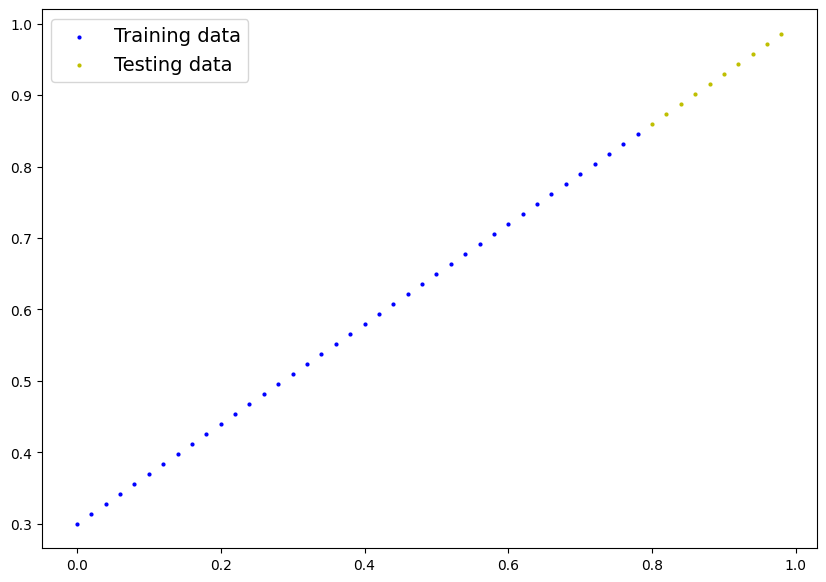

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=1, label="Predictions")

  # legend
  plt.legend(prop={"size": 14});

plot_predictions()

In [ ]:
# Building model

class LinearRegressionModel(nn.Module): # .Module is the building block of nn
  def __init__(self):
    super().__init__()
    # nn.Parameter are specifically created for learning parameter
    self.weight = nn.Parameter(torch.rand(1, # Starts with random no. then adjust it
                                          dtype=torch.float,
                                          requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, # Starts with random no. then adjust it
                                          dtype=torch.float,
                                          requires_grad=True))

  # Forward defines the computation in model
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weight * x + self.bias

torch.manual_seed(42)
# Creating Model
model_0 = LinearRegressionModel()

# Seeing model infoI()
list(model_0.parameters())
# or as a dict
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

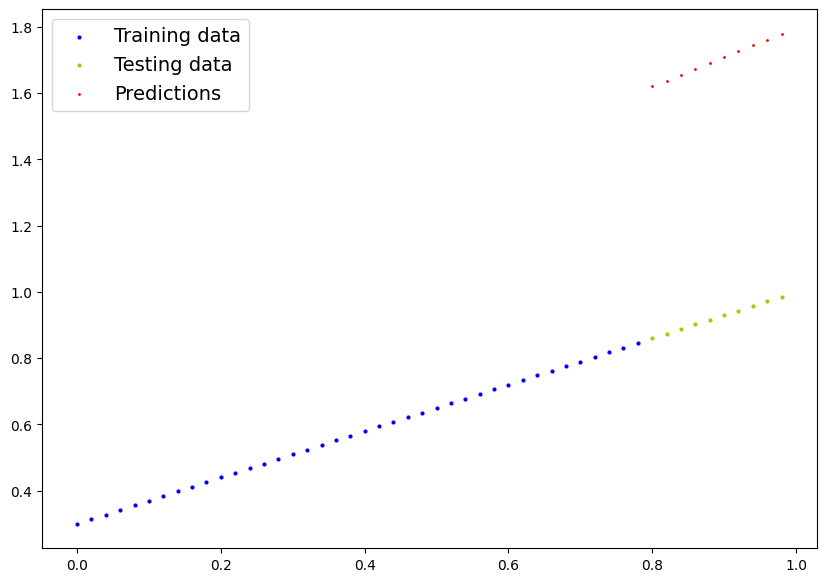

In [ ]:
# Making prediction using torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(X_test)

"""torch.inference_mode() turns off a bunch of things (like gradient tracking,
 which is necessary for training but not for inference) to make forward-passes
 (data going through the forward() method) faster."""

"""In older PyTorch code, you may also see torch.no_grad() being used for
inference. While torch.inference_mode() and torch.no_grad() do similar things,
torch.inference_mode() is newer, potentially faster and preferred. """

plot_predictions(predictions=y_preds)

Epoch: 0, Train_loss: 0.6860889196395874, Test_loss: 0.7637526988983154
Epoch: 10, Train_loss: 0.5708791017532349, Test_loss: 0.6290428042411804
Epoch: 20, Train_loss: 0.45566922426223755, Test_loss: 0.4943329691886902
Epoch: 30, Train_loss: 0.34045934677124023, Test_loss: 0.35962313413619995
Epoch: 40, Train_loss: 0.2252494841814041, Test_loss: 0.2249133139848709
Epoch: 50, Train_loss: 0.1100396141409874, Test_loss: 0.09020347893238068
Epoch: 60, Train_loss: 0.009724985808134079, Test_loss: 0.020998019725084305
Epoch: 70, Train_loss: 0.006216754671186209, Test_loss: 0.014099234715104103
Epoch: 80, Train_loss: 0.002788322512060404, Test_loss: 0.005826681852340698
Epoch: 90, Train_loss: 0.007095950655639172, Test_loss: 0.00754010071977973


OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

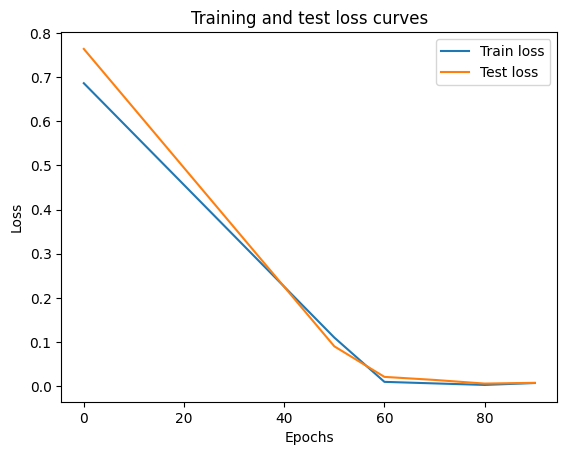

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr= .01)
# List for show casing model parameters
epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 100

for epoch in range(epochs):
  # Training lood

  model_0.train() # Put the model in training mode
  y_pred = model_0(X_train) # Goes through the whole data once and calculate the forward method
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  # Note: If I did not zero the gread the loss would backward loss would have
  # colided with the forward loos(i.e. calculating loss twice), zero gread means
  # starging fresh every iteration

  loss.backward() # Do the backpropagation
  optimizer.step() # Optimizes based on loss

  # Testing loop

  model_0.eval() # Set the model in evalutaion mode
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Shows losses every 10 epoch later
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch}, Train_loss: {loss}, Test_loss: {test_loss}")



# Ploting the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

model_0.state_dict()

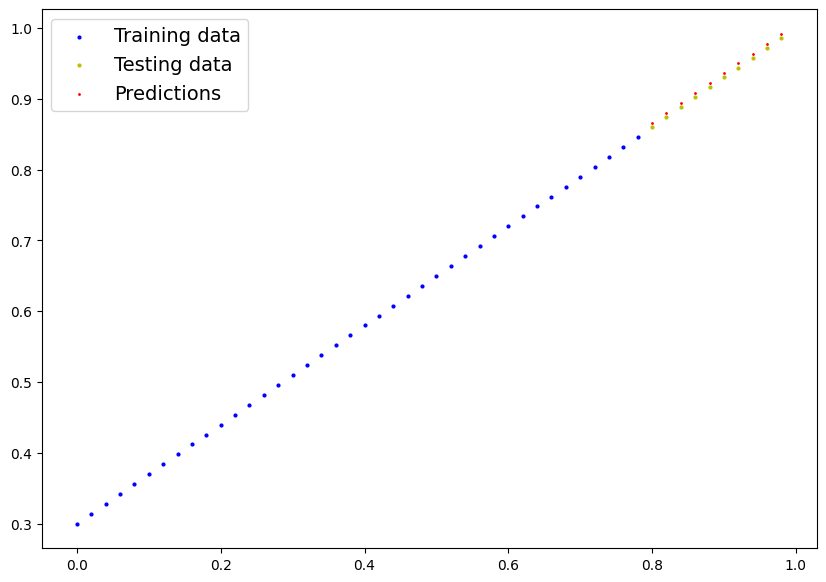

In [ ]:
plot_predictions(predictions= test_pred)

In [ ]:
# Saving and loading model

import os

MODEL_PATH = "PyTorch_tutorial_FFC"
if not os.path.exists(MODEL_PATH):
  os.makedirs(MODEL_PATH)

model_name = "pytorch_workflow_model_0"
MODEL_SAVE_PATH = os.path.join(MODEL_PATH, model_name)

torch.save(obj= model_0.state_dict(), f = MODEL_SAVE_PATH) # Only saved the parameters as dict.

# Load the model
# This how to load model: torch.nn.Module.load_state_dict(torch.load(PATH))
saved_model = LinearRegressionModel()
saved_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
# takes the loaded state dictionary and copies the parameters to the corresponding parameters of the model instance.
# Why use .load inside of .load_sate_dict?
"""State Preservation: Serialization captures the current state of the model's
parameters, including the learned weights and biases. Model Restoration: Deserialization
restores the model's state to the saved state, allowing it to make predictions as
if it were the original trained model."""
# Deserialization happens on 17th line without it we will have a new and untrained model